# Dataset Attrition


Employee attrition happens when employees retire or quit, and the company doesn't replace them. This can be expensive for businesses because they lose productivity and important employee knowledge.

“Turnover” and “attrition” are human resource terms that are often confused. Both refer to employees leaving a company, but there are key differences. Turnover includes various actions like discharge, termination, resignation, or abandonment. Attrition, on the other hand, happens when an employee retires or when the employer eliminates the position. The main difference is that with turnover, the company looks to replace the employee, while with attrition, the employer either leaves the vacancy unfilled or eliminates the job role entirely.


- **Age**: Numerical Discrete Data
- **Attrition**: Text Categorical Data
- **BusinessTravel**: Text Categorical Data
- **DailyRate**: Numerical Discrete Data
- **Department**: Text Categorical Data
- **DistanceFromHome**: Numerical Discrete Data
- **Education**: Numerical Categorical Data
  - 1: Below College
  - 2: College
  - 3: Bachelor
  - 4: Master
  - 5: Doctor
- **EducationField**: Text Categorical Data
- **EmployeeCount**: Numerical Categorical Data
- **EmployeeNumber**: Numerical Categorical Data
- **EnvironmentSatisfaction**: Numerical Categorical Data
  - 1: Low
  - 2: Medium
  - 3: High
  - 4: Very High
- **Gender**: Text Categorical Data
- **HourlyRate**: Numerical Discrete Data
- **JobInvolvement**: Numerical Categorical Data
  - 1: Low
  - 2: Medium
  - 3: High
  - 4: Very High
- **JobLevel**: Numerical Categorical Data
- **JobRole**: Text Categorical Data
- **JobSatisfaction**: Numerical Categorical Data
  - 1: Low
  - 2: Medium
  - 3: High
  - 4: Very High
- **MaritalStatus**: Text Categorical Data
- **MonthlyIncome**: Numerical Discrete Data
- **MonthlyRate**: Numerical Discrete Data
- **NumCompaniesWorked**: Numerical Discrete Data
- **Over18**: Text Categorical Data
- **OverTime**: Text Categorical Data
- **PercentSalaryHike**: Numerical Discrete Data
- **PerformanceRating**: Numerical Categorical Data
  - 1: Low
  - 2: Good
  - 3: Excellent
  - 4: Outstanding
- **RelationshipSatisfaction**: Numerical Categorical Data
  - 1: Low
  - 2: Medium
  - 3: High
  - 4: Very High
- **StandardHours**: Numerical Discrete Data
- **StockOptionLevel**: Numerical Categorical Data
- **TotalWorkingYears**: Numerical Discrete Data
- **TrainingTimesLastYear**: Numerical Discrete Data
- **WorkLifeBalance**: Numerical Categorical Data
  - 1: Bad
  - 2: Good
  - 3: Better
  - 4: Best
- **YearsAtCompany**: Numerical Discrete Data
- **YearsInCurrentRole**: Numerical Discrete Data
- **YearsSinceLastPromotion**: Numerical Discrete Data
- **YearsWithCurrManager**: Numerical Discrete Data

### Import Necessary Library

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [4]:
path = "C:\\Users\\acer\\Desktop\\My Folders\\how to data sci\\My projects\\Final Project Greystone\\Subject_2-Employee attrition CSV.csv"
df = pd.read_csv(path)

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Clean and prepare data

In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

To count the distribution of attrition and visualize

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


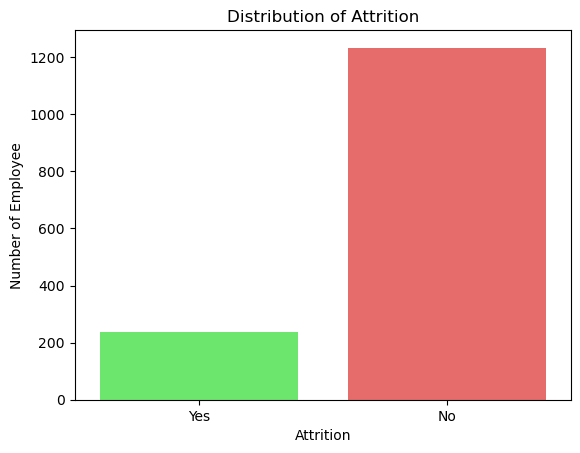

In [11]:
sns.countplot(df['Attrition'], palette=['#58FA58', '#FA5858'])
plt.title("Distribution of Attrition")
plt.ylabel("Number of Employee")

plt.show()

### Data Summary

Before diving into detailed visualizations, it's essential to understand our data. This will help us work more effectively throughout the project. Here are some key questions to consider:

- **Columns and Observations**: How many columns and observations are in our dataset?
- **Missing Data**: Are there any missing values in our dataset?
- **Data Types**: What data types are present in the dataset?
- **Data Distribution**: Is the data right-skewed, left-skewed, or symmetric? This is important for statistical analysis and modeling.
- **Data Structure**: Some datasets can be complex, but tools like the tidyverse package can help manage them.
- **Data Meaning**: What do the data represent? Many features are ordinal variables, where the order matters (e.g., Job Satisfaction: 1 = "Low" to 4 = "Very High").
- **Label**: What is the output or target variable?

### Summary:
- **Dataset Structure**: 1470 observations (rows), 35 features (variables)
- **Missing Data**: No missing data, making it easier to work with.
- **Data Types**: The dataset contains only two data types: factors and integers.
- **Label**: The label is "Attrition," and our goal is to understand why employees are leaving the organization.
- **Imbalanced Dataset**: 1237 employees (84%) did not leave, while 237 employees (16%) did, indicating an imbalanced dataset.

This summary gives us a clear understanding of our data's structure and characteristics, guiding our analysis and modeling efforts.


To show the correlation of each feature

In [12]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

Visualize the heatmap for the correlation

<AxesSubplot:>

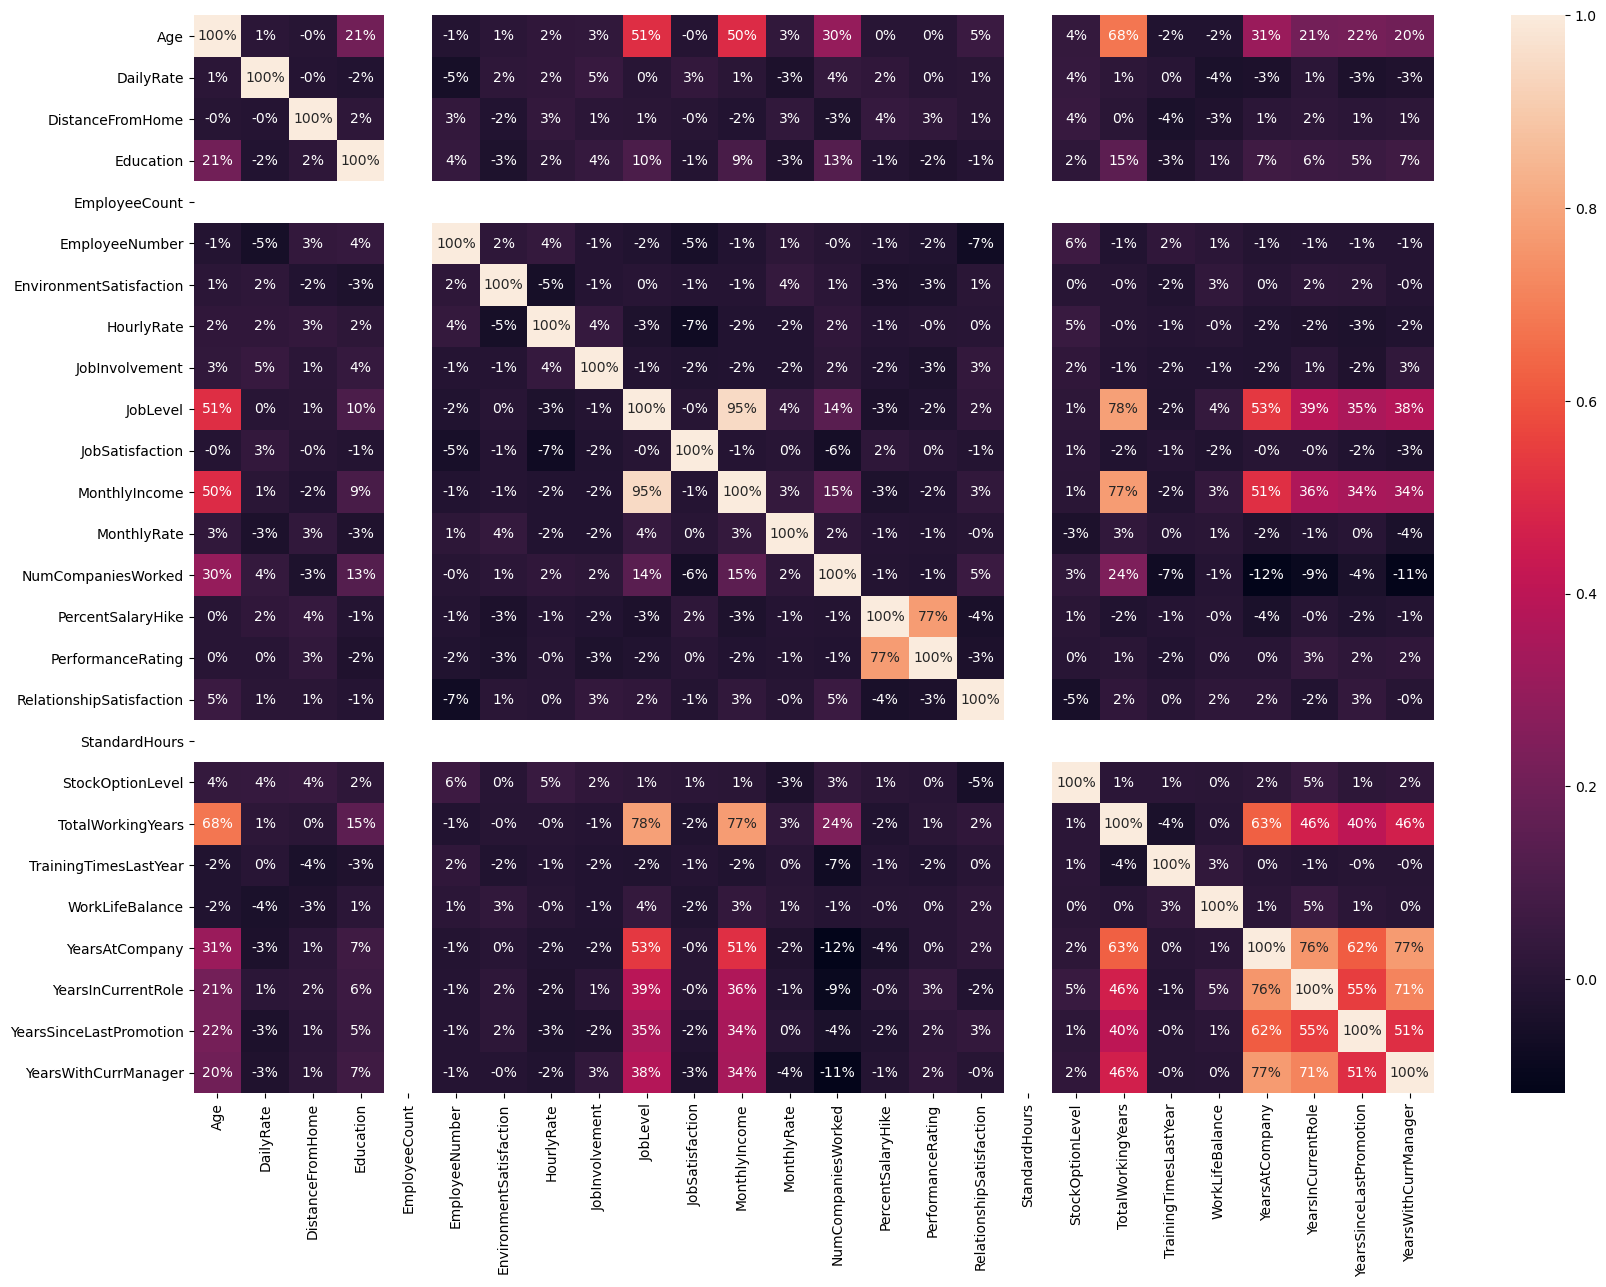

In [13]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

To remove unneeded columns
- StandardHours contains only value 80
- EmployeeCount contains only value 1
- Over18 contain only value 'Yes'
- EmployeeNumbe it is a sign

In [14]:
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)
df = df.drop('Over18', axis = 1)

To show overall information that include column, number of values, na values, and type of values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

I would like to understand how the variables correlate with attrition. To do this, I need to convert them to numeric values by creating a dictionary and mapping them. Additionally, I will create a new dataframe by duplicating the original one as a backup. Then, I will visualize the correlations using a heatmap.

In [16]:
dict_Attrition = {"No": 0, "Yes": 1}
df_new = df.copy()
df_new['Attrition'] = df_new['Attrition'].map(dict_Attrition)

<AxesSubplot:>

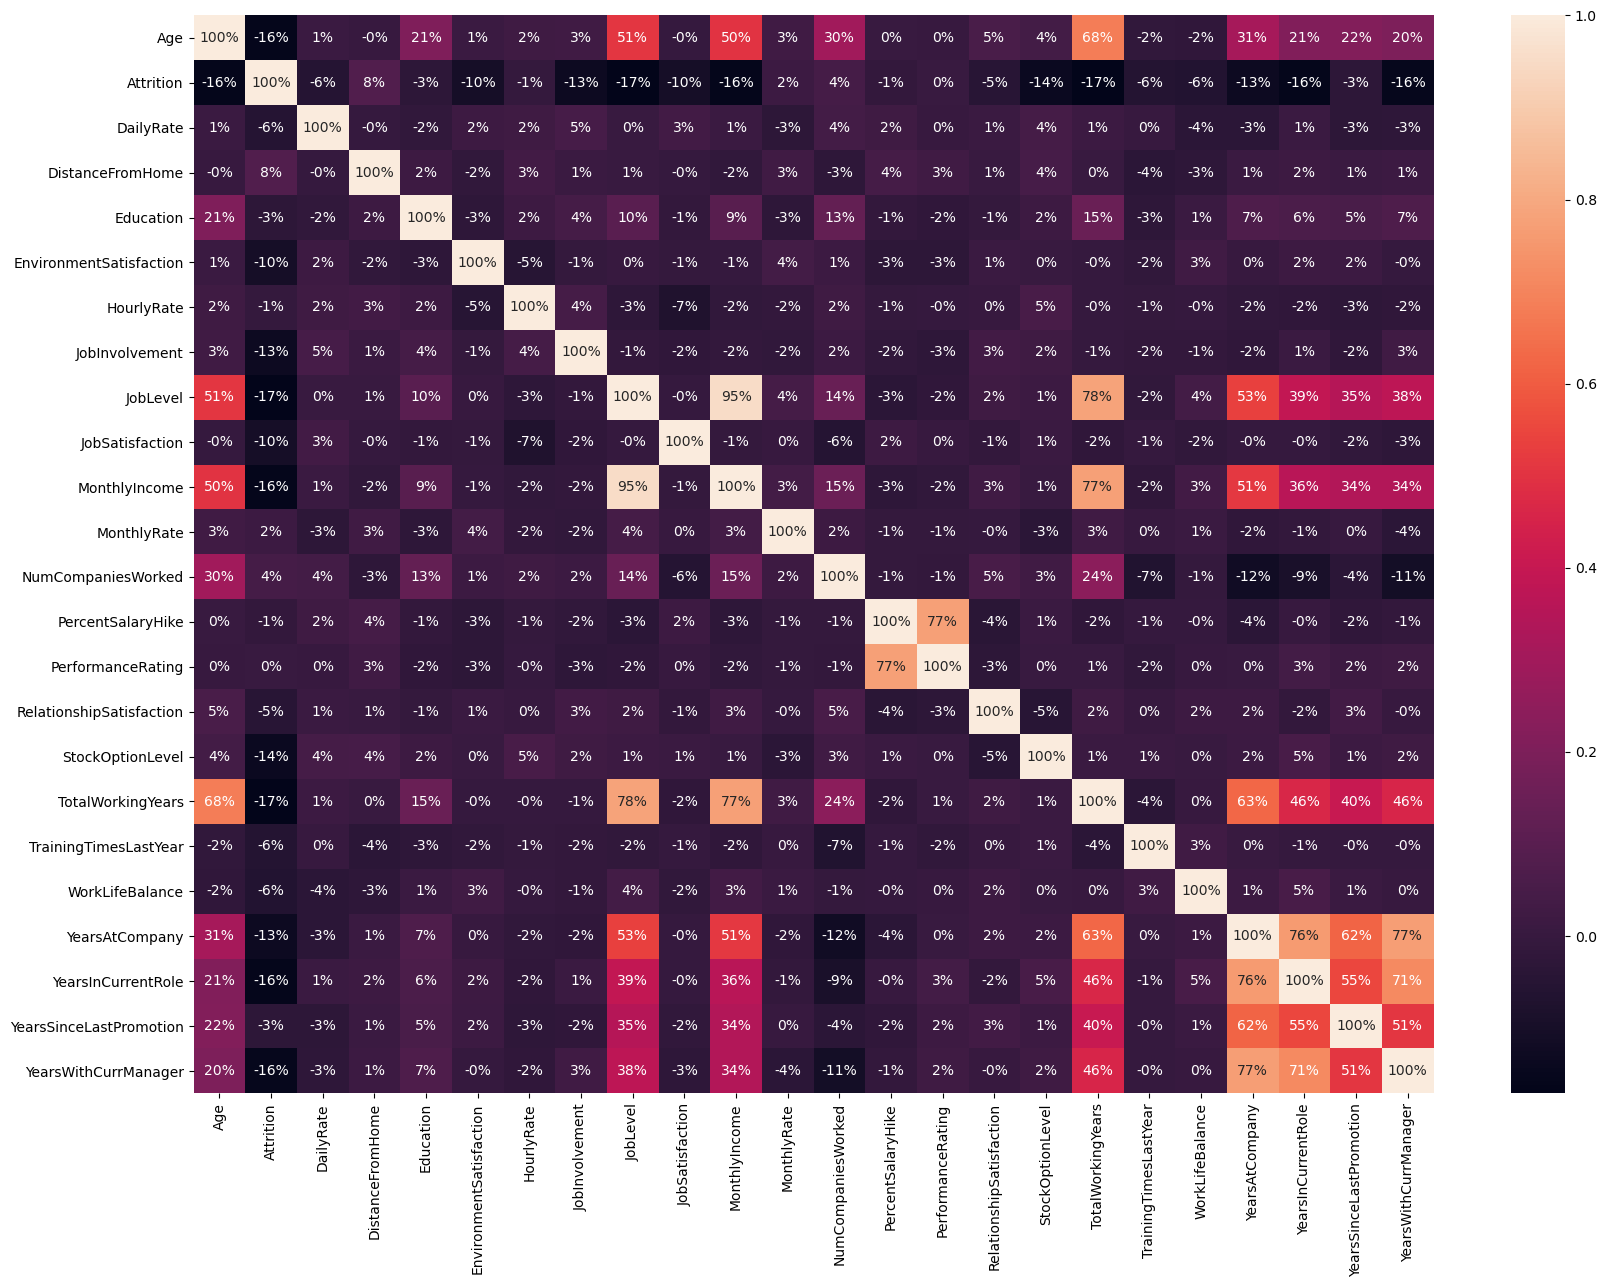

In [17]:
plt.figure(figsize=(20,14))
sns.heatmap(df_new.corr(), annot=True, fmt='.0%')

- Variables like TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager are highly correlated. This can cause multicollinearity in regression modeling, affecting how we interpret the results.
- This graph shows Pearson's correlation values, with high correlations between variables like Job Level and Monthly Income, and Job Level and Total Working Hours. Since Job Level is an ordinal variable, we should use Spearman's correlation coefficients instead of Pearson's.
- Similarly, Age seems to have a moderate linear relationship with MonthlyIncome, Total Working Years and MonthlyIncome which intuitively makes sense.

## EDA

To visualize distribution of Attrition rate for each age

<AxesSubplot:xlabel='Age', ylabel='count'>

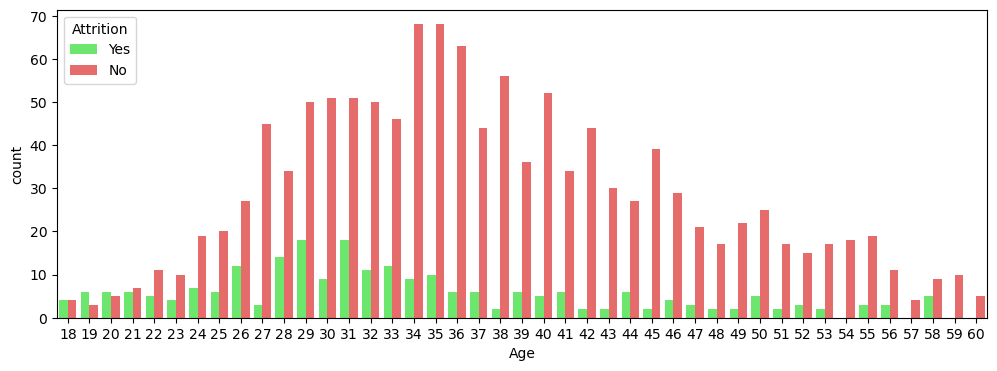

In [18]:
fig_size = (12, 4)
fig, ax = plt.subplots(figsize=fig_size)

sns.countplot(x='Age', hue='Attrition', data = df,ax = ax, palette=['#58FA58', '#FA5858'])

To plot densty of age in the organize

In [19]:
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
mean_age_overall = df['Age'].mean()

print(mean_age_female)
print(mean_age_male)
print(mean_age_overall)

37.32993197278912
36.6530612244898
36.923809523809524


To visualize age distirbution for each gender by using GridSpec

Text(0.5, 0, 'Age')

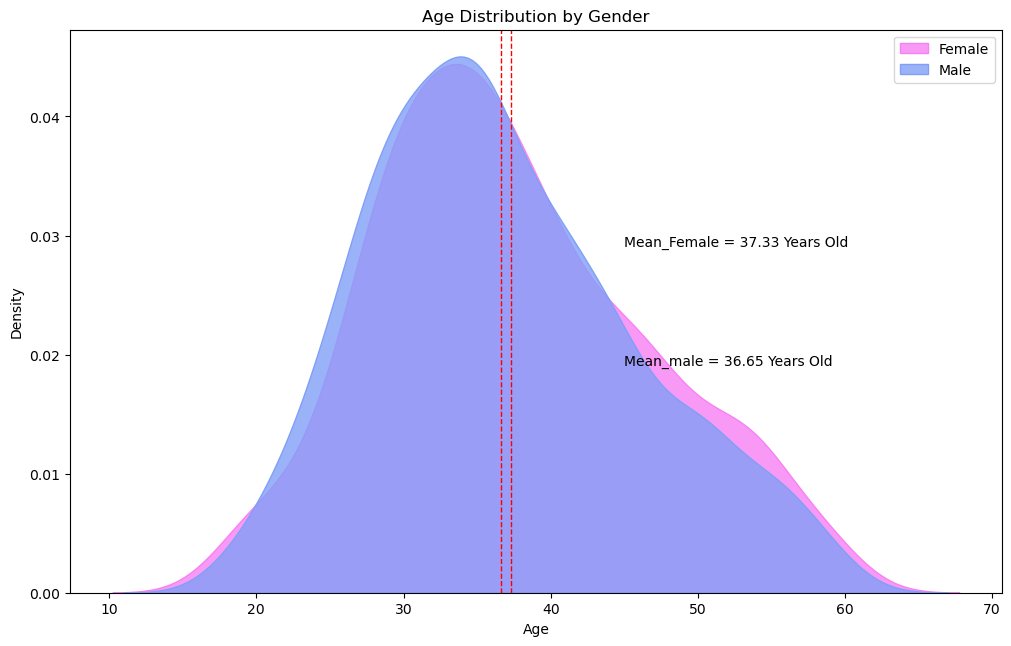

In [20]:
fig = plt.figure(constrained_layout=True, figsize=(10, 12))
gs = GridSpec(2, 1, figure=fig)


ax1 = fig.add_subplot(gs[0,0])
sns.kdeplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True, ax=ax1, color='#F781F3', alpha=0.8)
sns.kdeplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True, ax=ax1, color='#819FF7', alpha=0.8)
ax1.axvline(mean_age_female, color='red', linestyle='dashed', linewidth=1)
ax1.axvline(mean_age_male, color='red', linestyle='dashed', linewidth=1)
ax1.text(45, 0.03, f'Mean_Female = {mean_age_female:.2f} Years Old', color='black', ha='left', va='top')
ax1.text(45, 0.02, f'Mean_male = {mean_age_male:.2f} Years Old', color='black', ha='left', va='top')
ax1.set_title('Age Distribution by Gender')
ax1.legend(['Female', 'Male'])
ax1.set_xlabel('Age')

Age by Gender: The average age of females is 37.33 and for males is 36.65 and both distributions are similar.

Questions
- Job Roles: How many employees in each Job Role?
- Salary by Job Role: What's the average salary by job role?

Number of Employee by job role

In [21]:
import squarify

To create treemap for visualize the size of each job role in the company.

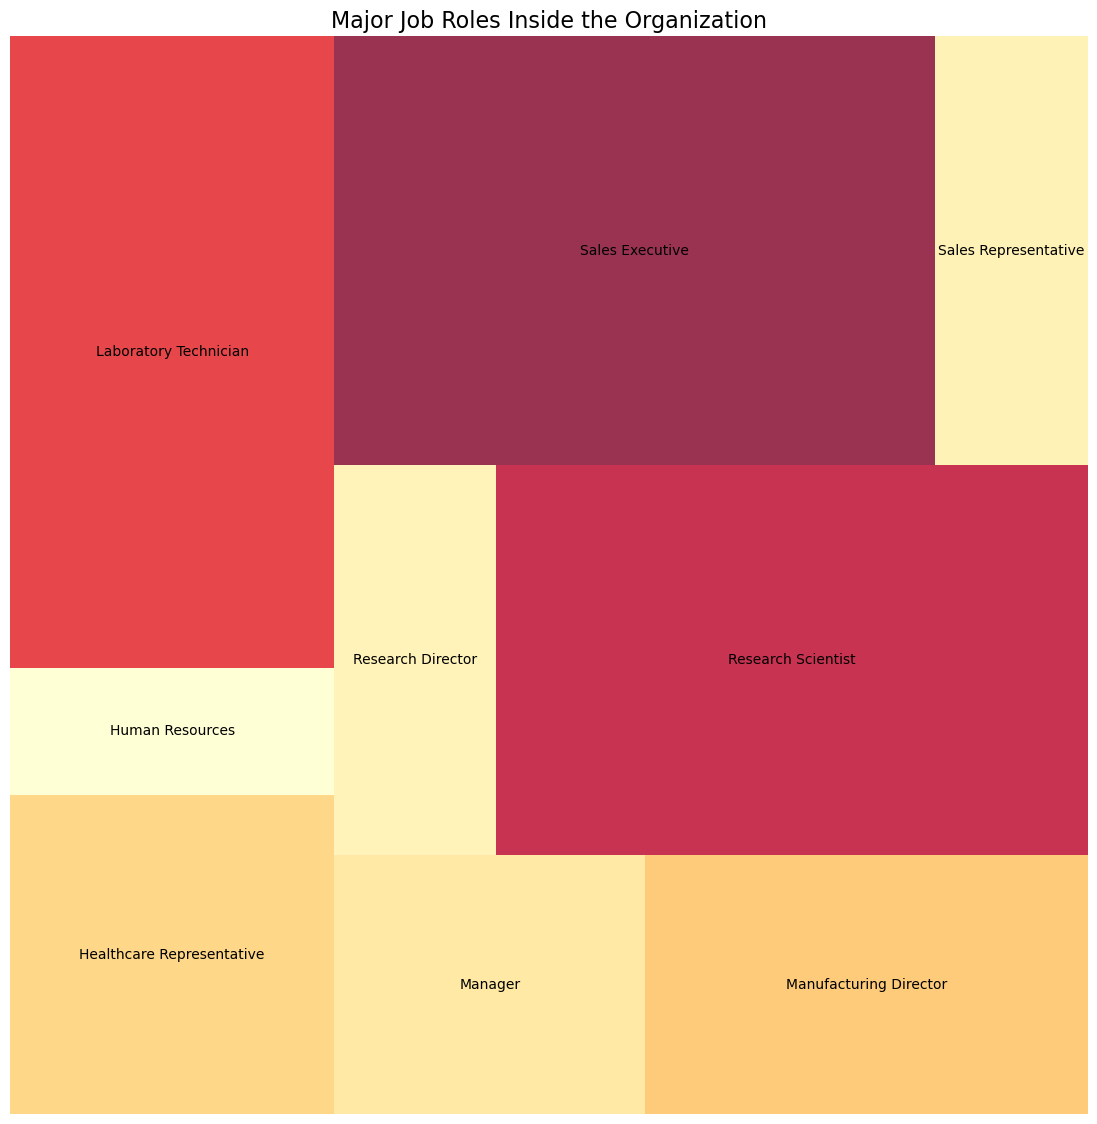

In [22]:
# Calculate the number of employees by JobRole
job_role_count = df.groupby('JobRole').size().reset_index(name='amount')


fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, aspect="equal")


cmap = plt.get_cmap('YlOrRd')
norm = plt.Normalize(vmin=job_role_count['amount'].min(), vmax=job_role_count['amount'].max())
colors = [cmap(norm(value)) for value in job_role_count['amount']]


squarify.plot(
    sizes=job_role_count['amount'],
    label=job_role_count['JobRole'],
    color=colors,
    alpha=0.8,
    ax=ax
)


plt.title('Major Job Roles Inside the Organization', fontsize=16)
plt.axis('off')
plt.show()

Sales and Research Scientist are the job positions with the highest number of employees.

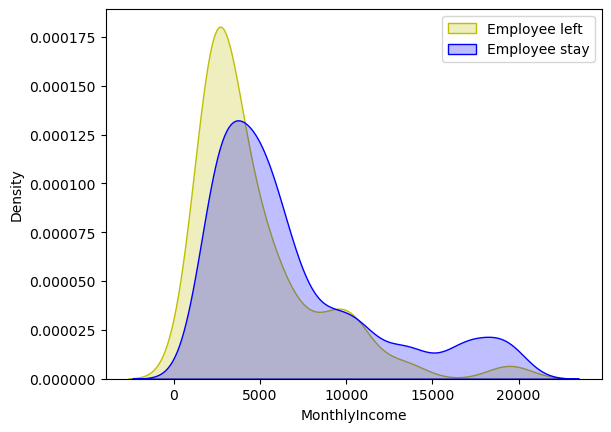

In [23]:
left=df[df[ 'Attrition']=='Yes']['MonthlyIncome'] 
stay=df[df[ 'Attrition']=='No']['MonthlyIncome'] 

sns.kdeplot(left, label = 'Employee left', shade = True, color = 'y' )
sns.kdeplot(stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

To calculate median and mean of monthly income for each job role

In [24]:
# Calculate median and mean salary by JobRole
job_sal = df.groupby('JobRole')['MonthlyIncome'].agg(median_salary='median', mean_salary='mean').reset_index()

# Calculate attrition rate by JobRole
attrition_rate = df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='attrition_rate')

job_sal

JobRole  median_salary   mean_salary
0  Healthcare Representative         6811.0   7528.763359
1            Human Resources         3093.0   4235.750000
2      Laboratory Technician         2886.0   3237.169884
3                    Manager        17454.5  17181.676471
4     Manufacturing Director         6447.0   7295.137931
5          Research Director        16510.0  16033.550000
6         Research Scientist         2887.5   3239.972603
7            Sales Executive         6231.0   6924.279141
8       Sales Representative         2579.0   2626.000000

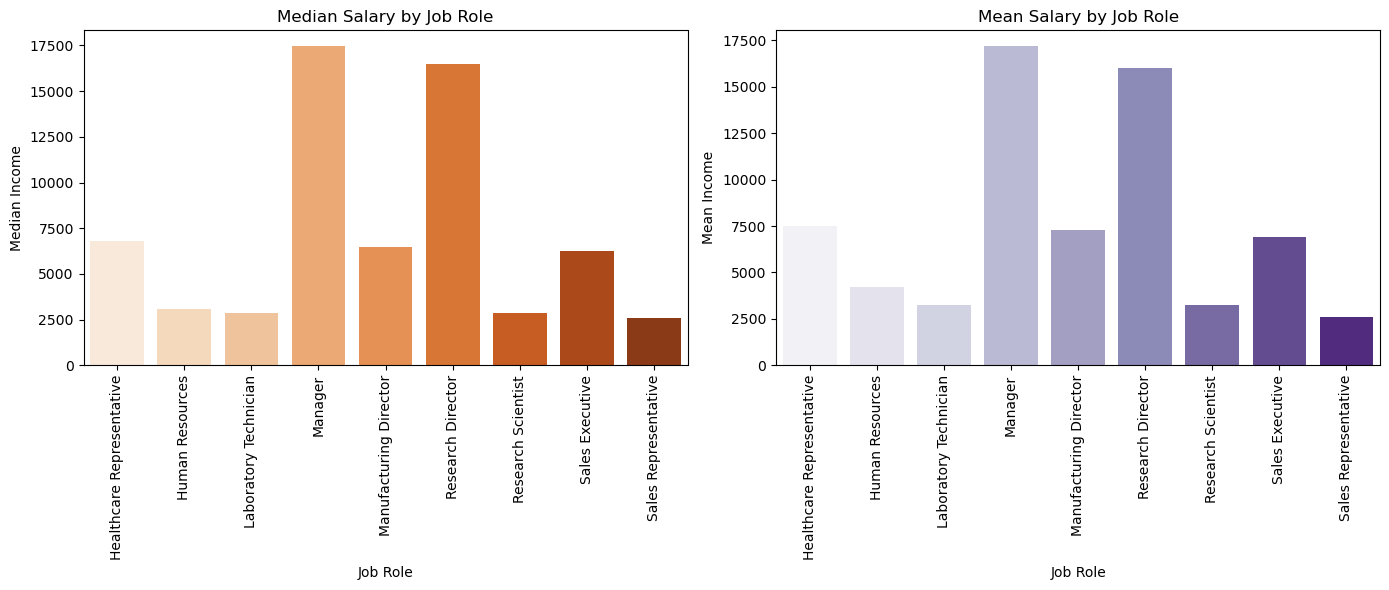

In [25]:
# Plot Median Salary by JobRole
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=job_sal, x='JobRole', y='median_salary', palette='Oranges')
plt.title('Median Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Median Income')
plt.xticks(rotation=90)

# Plot Mean Salary by JobRole
plt.subplot(1, 2, 2)
sns.barplot(data=job_sal, x='JobRole', y='mean_salary', palette='Purples')
plt.title('Mean Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Mean Income')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Managers and Research Directors have the highest salary on average.

In [26]:
df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition                        No        Yes
JobRole                                       
Healthcare Representative  9.204918  17.666667
Human Resources            6.600000  13.416667
Laboratory Technician      9.329949   9.661290
Manager                    7.927835  10.000000
Manufacturing Director     9.533333   8.800000
Research Director          8.474359   7.000000
Research Scientist         8.869388   9.765957
Sales Executive            9.026022  12.649123
Sales Representative       9.000000   8.151515

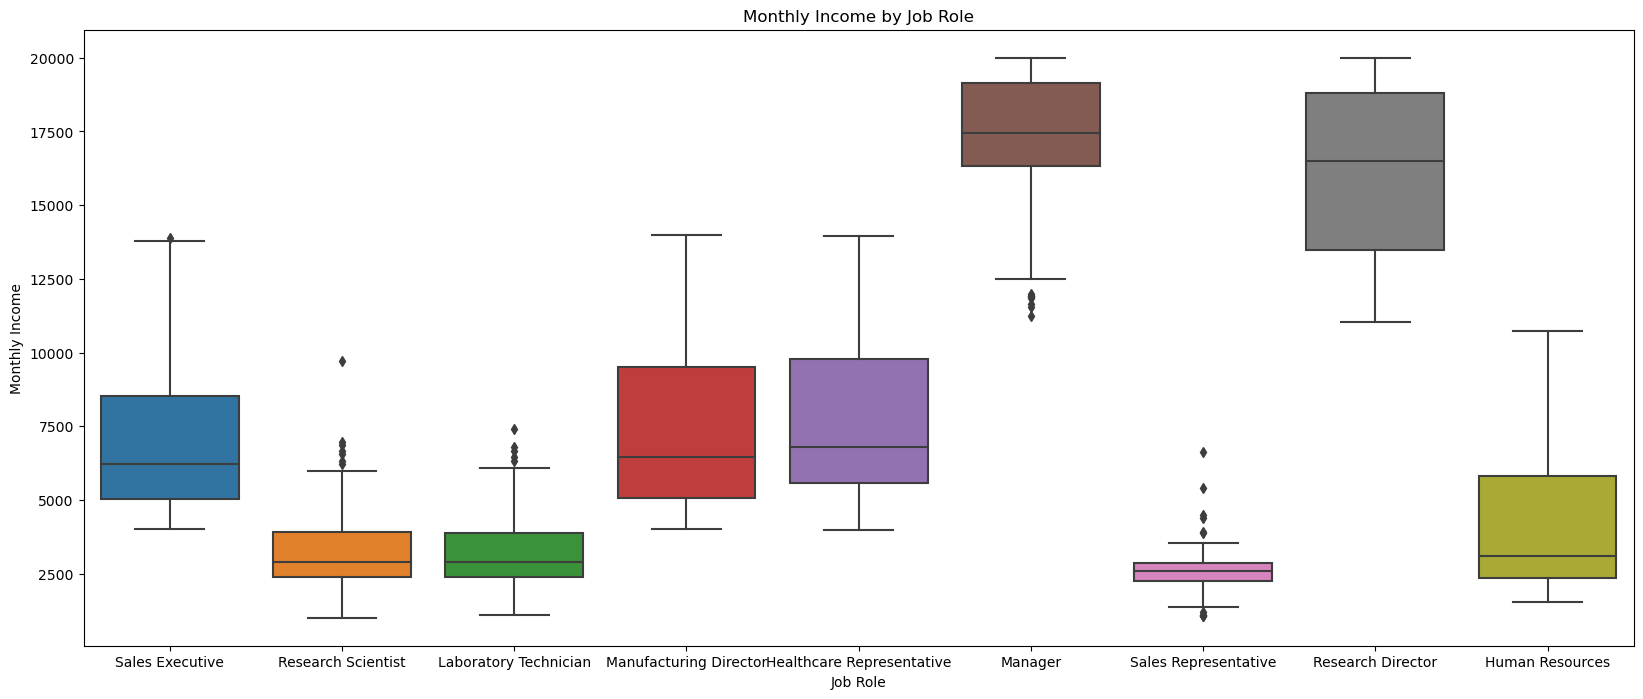

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()

- Monthly income varies significantly across different job roles.
- Some roles have higher median incomes
- There are outliers in certain job roles, indicating extreme income values.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


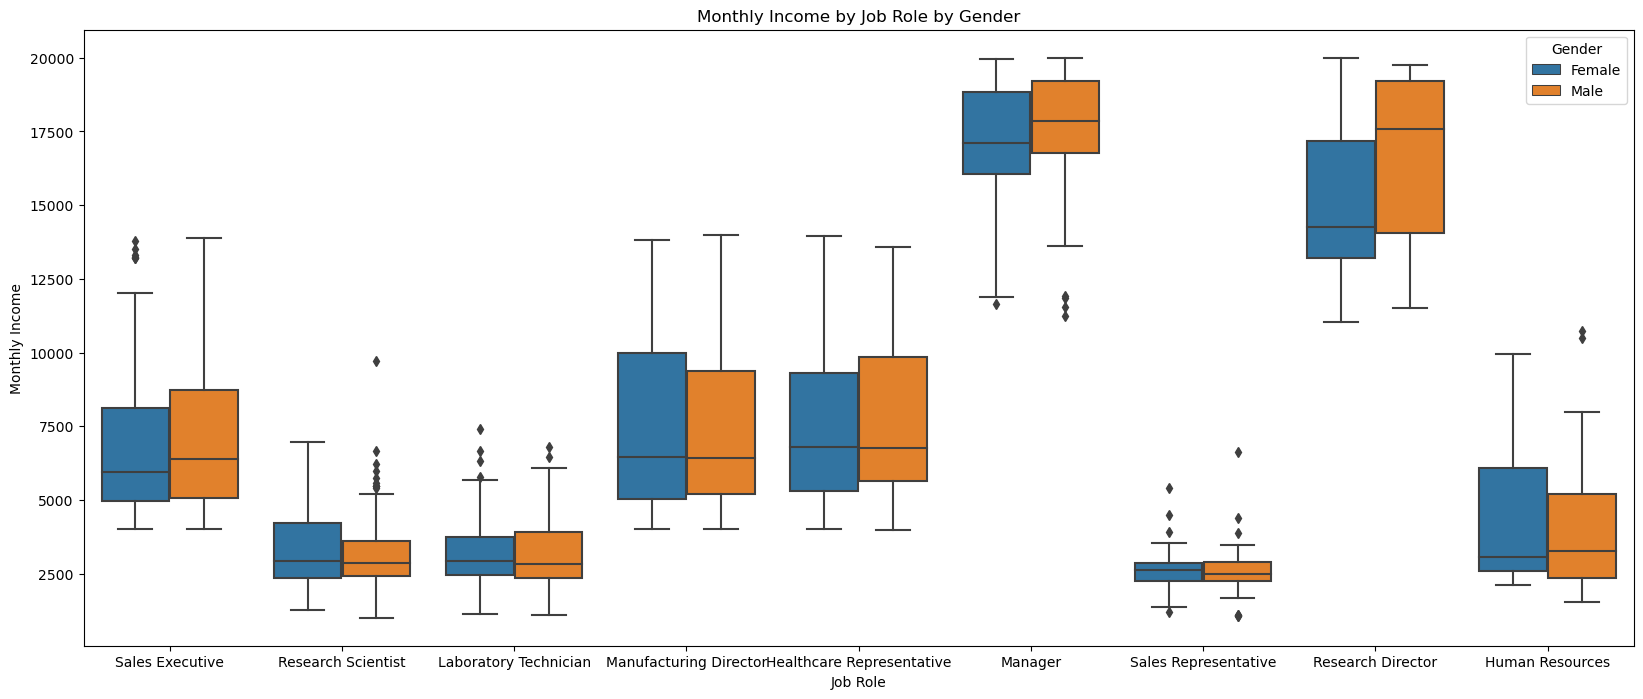

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole', 'MonthlyIncome',hue='Gender', data=df)
plt.title('Monthly Income by Job Role by Gender')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()

- In some roles, such as Sales Executive and Manufacturing Director, males tend to have slightly higher median incomes than females.
- Some roles, like Human Resources and Sales Representative, show a noticeable difference in income distribution between genders, with males having a wider range and higher median incomes.
- There are outliers in many job roles, indicating some individuals earn significantly more or less than the typical range for their role and gender.

To calculate the average evironment satisfaction by job roles and attrition, visualize with line plot.

In [29]:
env_attr = df.groupby(['JobRole', 'Attrition'])['EnvironmentSatisfaction'].mean().reset_index()
env_attr.columns = ['JobRole', 'Attrition', 'avg_env']

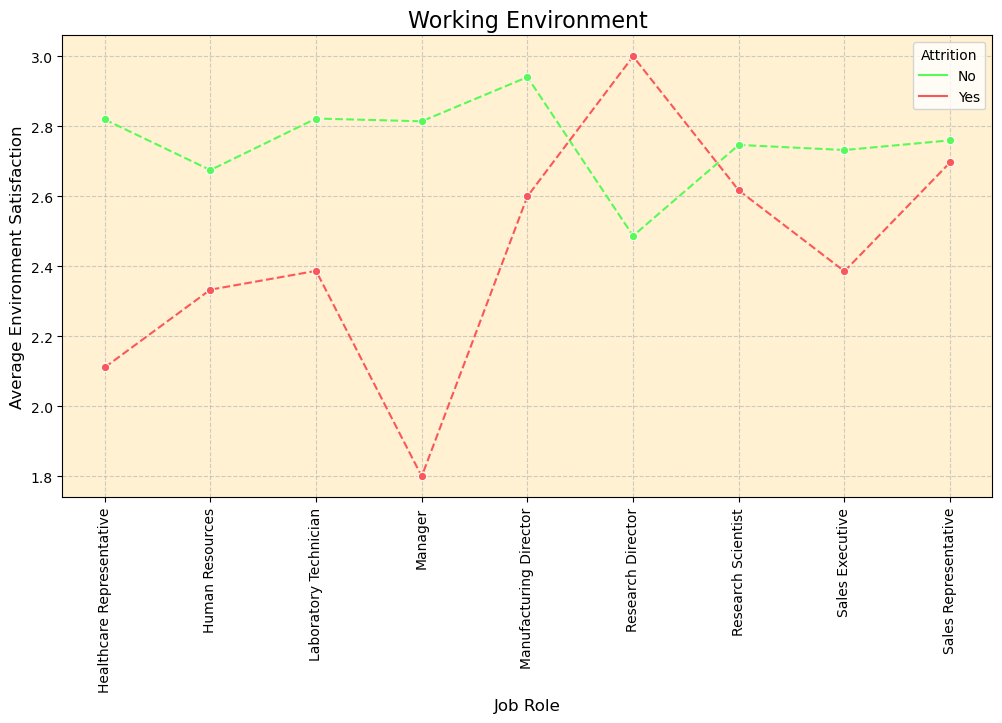

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=env_attr, x='JobRole', y='avg_env', hue='Attrition', marker='o', linestyle='--', palette=['#58FA58', '#FA5858'])
plt.title('Working Environment', fontsize=16, ha='center')
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Average Environment Satisfaction', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Attrition')
plt.gca().set_facecolor('#FFF1D2')

plt.savefig('corr.png', bbox_inches='tight')

plt.show()

- Employees who have not left the company (Attrition: No, green line) tend to have higher average environment satisfaction across most job roles compared to those who have left.
-  Employees in Healthcare Representative, Human Resources, and Research Scientist who stayed have notably higher satisfaction than those who left.
- Laboratory Technician and Manager show a significant dip in satisfaction among employees who left, with Managers having the lowest satisfaction among those who left.

To plot distribution monthly income of employee

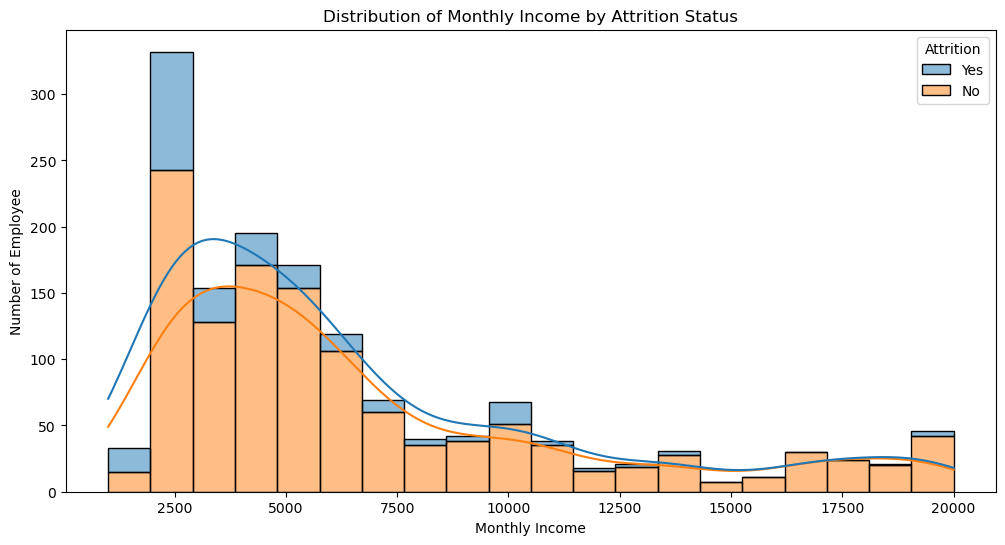

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Monthly Income by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employee')
plt.show()

Most of employee get 2500-5000 monthly income.

To calculate mean of monthly income by attrition and department. Then visualize with bar chart.

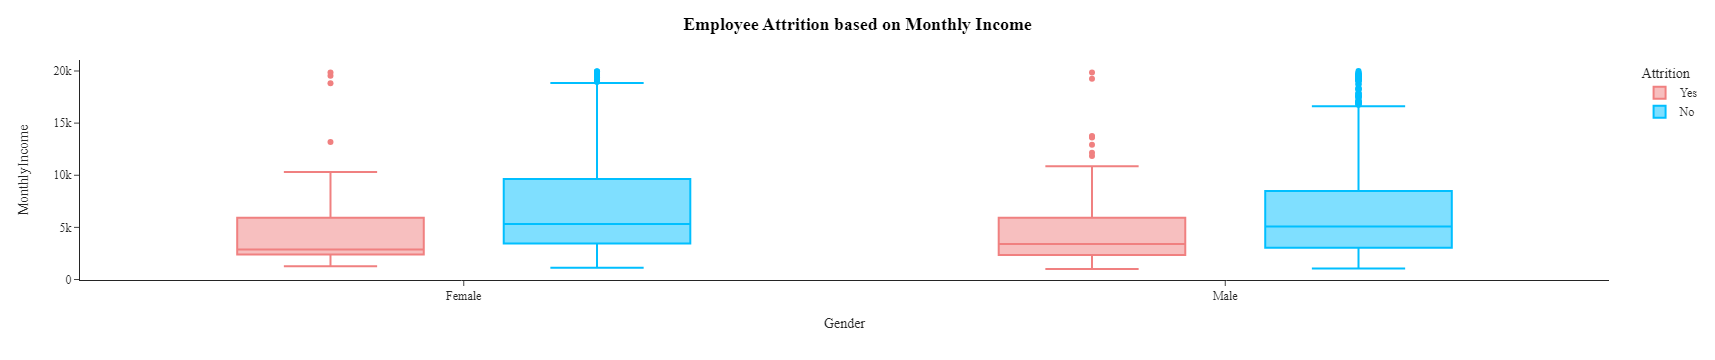

In [32]:
import plotly.express as px

fig=px.box(df,x='Gender',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Monthly Income</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [33]:
avg_income = df.groupby(['Attrition', 'Department'])['MonthlyIncome'].mean().reset_index()
avg_income.columns = ['Attrition', 'Department', 'avg_inc']

avg_income

Attrition              Department      avg_inc
0        No         Human Resources  7345.980392
1        No  Research & Development  6630.326087
2        No                   Sales  7232.240113
3       Yes         Human Resources  3715.750000
4       Yes  Research & Development  4108.075188
5       Yes                   Sales  5908.456522

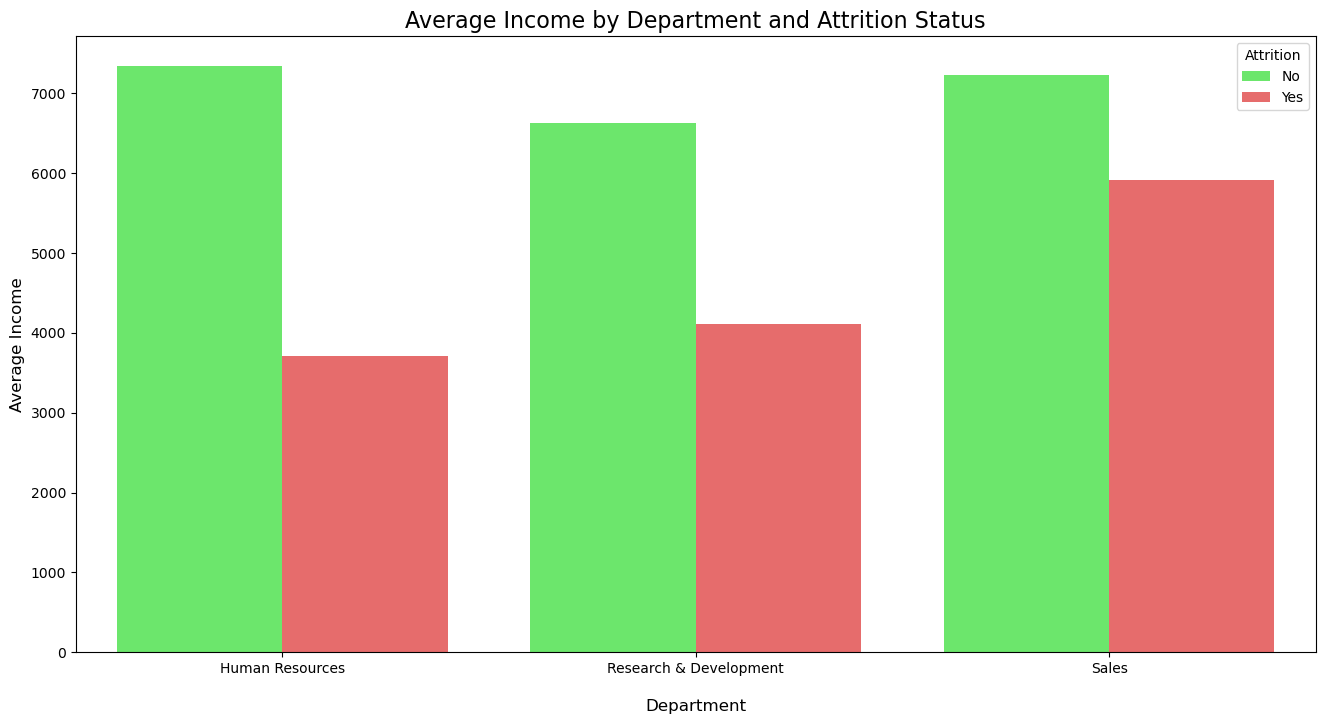

In [34]:
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_income, x='Department', y='avg_inc', hue='Attrition', palette=['#58FA58', '#FA5858'])

plt.title('Average Income by Department and Attrition Status', fontsize=16, ha='center')
plt.xlabel('\nDepartment', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.show()

In [35]:
attrition_by_department = pd.crosstab(df['Department'], df['Attrition'], margins=True, margins_name="Total")


attrition_by_department['Attrition Rate'] = (attrition_by_department['Yes'] / attrition_by_department['Total']) * 100

attrition_by_department[['Yes', 'No', 'Total', 'Attrition Rate']]

Attrition               Yes    No  Total  Attrition Rate
Department                                              
Human Resources          12    51     63       19.047619
Research & Development  133   828    961       13.839750
Sales                    92   354    446       20.627803
Total                   237  1233   1470       16.122449

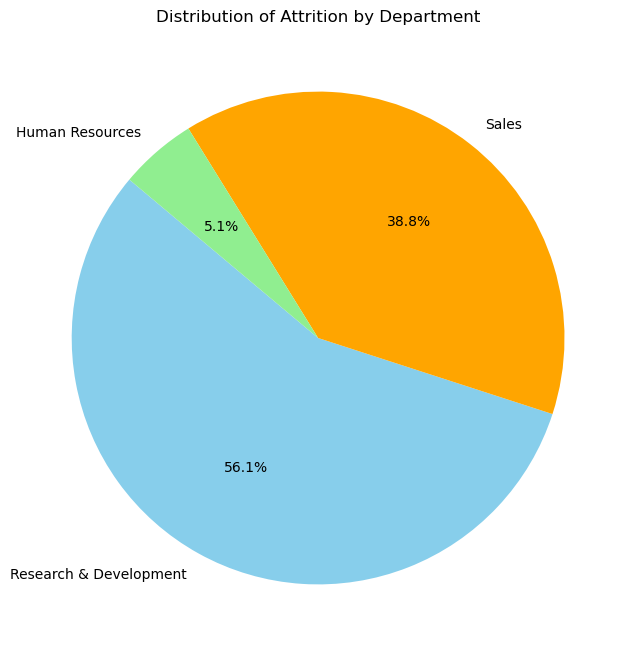

In [36]:
attrition_counts = df[df['Attrition'] == 'Yes']['Department'].value_counts()
departments = attrition_counts.index.tolist()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=departments, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribution of Attrition by Department')
plt.show()

We can see huge differences in each department by attrition status.

In [37]:
attritions = df[df['Attrition'] == 'Yes']
attritions['WorkLifeBalance'] = attritions['WorkLifeBalance'].astype('category')

C:\Users\acer\AppData\Local\Temp\ipykernel_12624\2785269619.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
by_department = attritions.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='count')

<Figure size 800x400 with 0 Axes>

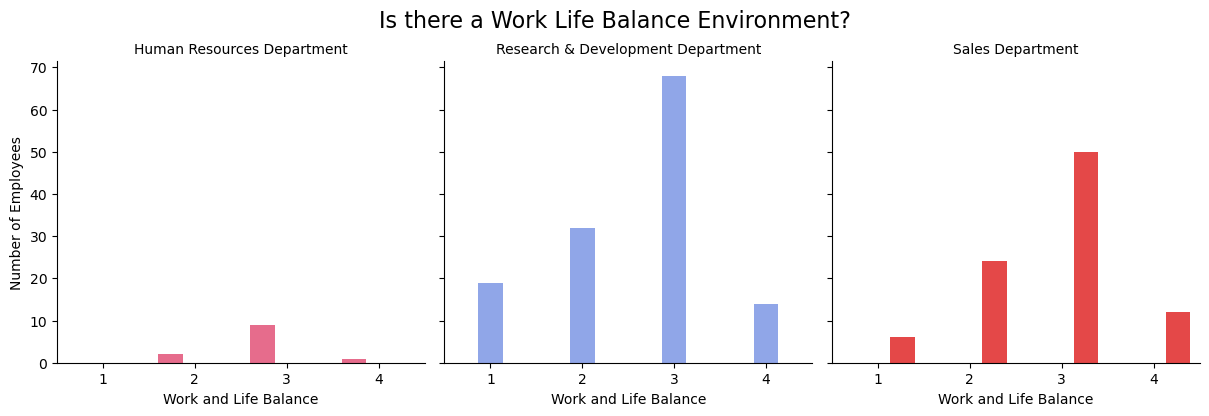

In [39]:
plt.figure(figsize=(8, 4))

# Create the plot
g = sns.catplot(
    data=by_department,
    x='WorkLifeBalance',
    y='count',
    hue='Department',
    kind='bar',
    col='Department',
    palette=['#FA5882', '#819FF7', '#FE2E2E'],
    height=4,
    aspect=1
)

# Customize the plot
g.set_axis_labels("Work and Life Balance", "Number of Employees")
g.set_titles("{col_name} Department")
g.set(xticks=range(len(attritions['WorkLifeBalance'].cat.categories)))
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Is there a Work Life Balance Environment?", fontsize=16)

# Add labels to each bar
for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{int(v.get_height())}' if not pd.isna(v.get_height()) else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', color='white', fontsize=10, fontstyle='italic')

# Display the plot
plt.show()

To calculate median for monthly income by job stisfaction and attrition. Then visualize by separate for who left and stayed.

In [40]:
high_inc = df.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome'].median().reset_index()
high_inc.columns = ['JobSatisfaction', 'Attrition', 'med']

high_inc

JobSatisfaction Attrition     med
0                1        No  5373.0
1                1       Yes  3260.0
2                2        No  5178.0
3                2       Yes  2811.5
4                3        No  5042.0
5                3       Yes  3441.0
6                4        No  5231.0
7                4       Yes  3167.0

Plot for employees who stayed in the company

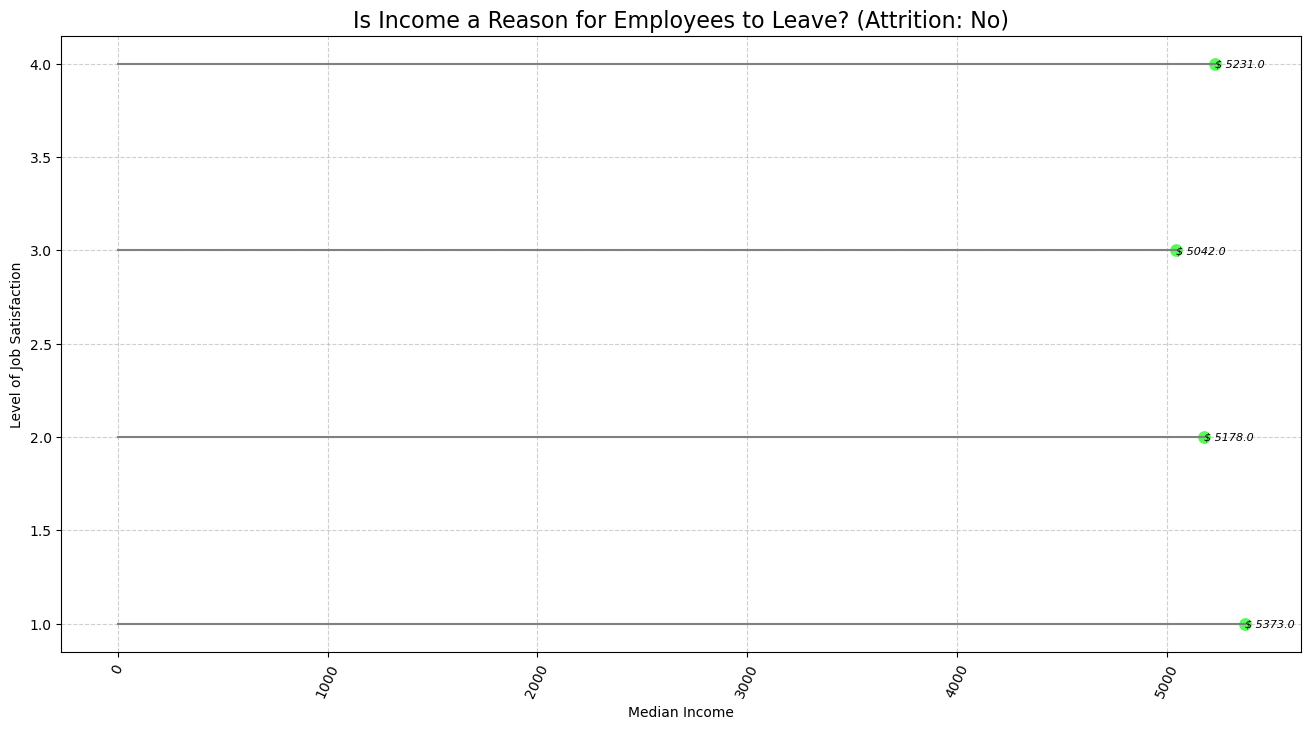

In [41]:
high_inc_no = high_inc[high_inc['Attrition'] == 'No']

plt.figure(figsize=(16, 8))
sns.scatterplot(data=high_inc_no, x='med', y='JobSatisfaction', color='#58FA58', s=100)
for index, row in high_inc_no.iterrows():
    plt.plot([0, row.med], [row.JobSatisfaction, row.JobSatisfaction], color='gray', linestyle='-')
    plt.text(row.med, row.JobSatisfaction, f'$ {round(row.med, 2)}', color='black', ha='left', va='center', fontsize=8, fontstyle='italic')
plt.title('Is Income a Reason for Employees to Leave? (Attrition: No)', fontsize=16, ha='center')
plt.xlabel('Median Income')
plt.ylabel('Level of Job Satisfaction')
plt.xticks(rotation=65)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plot for employees who left the company

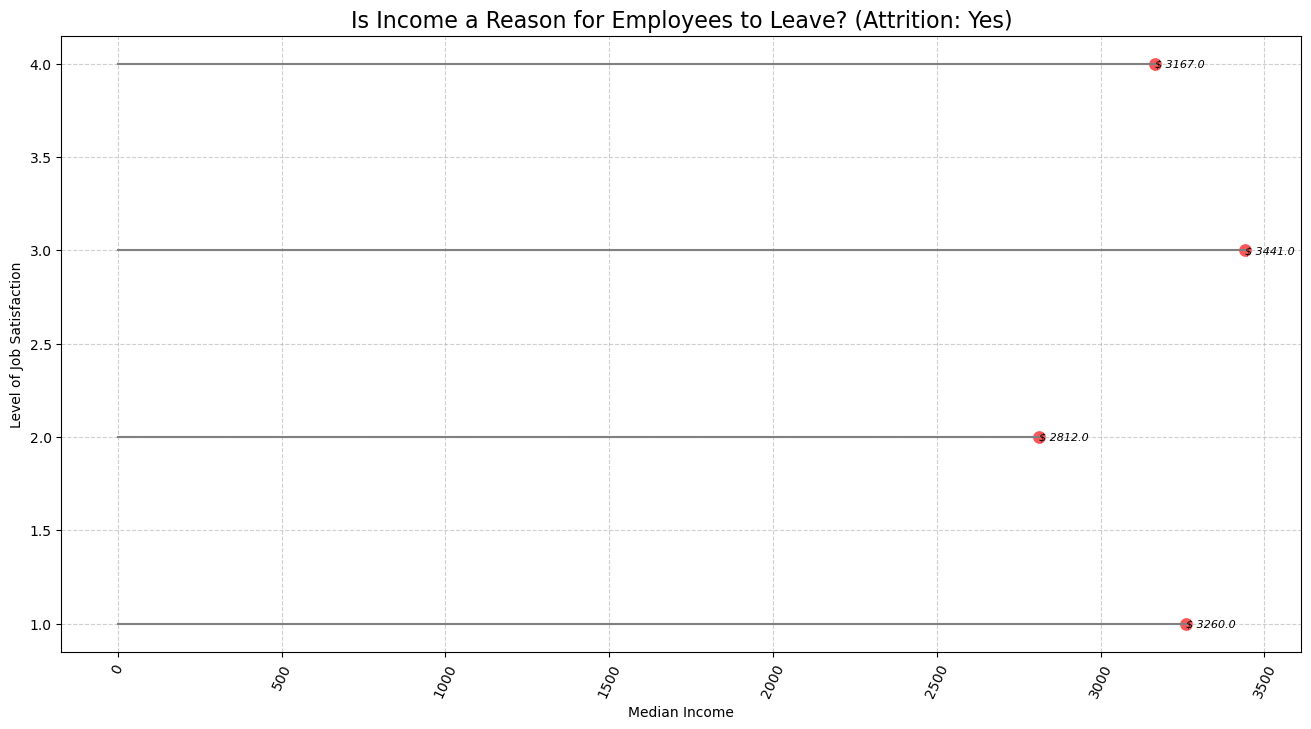

In [42]:
high_inc_yes = high_inc[high_inc['Attrition'] == 'Yes']


plt.figure(figsize=(16, 8))
sns.scatterplot(data=high_inc_yes, x='med', y='JobSatisfaction', color='#FA5858', s=100)
for index, row in high_inc_yes.iterrows():
    plt.plot([0, row.med], [row.JobSatisfaction, row.JobSatisfaction], color='gray', linestyle='-')
    plt.text(row.med, row.JobSatisfaction, f'$ {round(row.med, 0)}', color='black', ha='left', va='center', fontsize=8, fontstyle='italic')
plt.title('Is Income a Reason for Employees to Leave? (Attrition: Yes)', fontsize=16, ha='center')
plt.xlabel('Median Income')
plt.ylabel('Level of Job Satisfaction')
plt.xticks(rotation=65)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

It seems the lower the job satisfaction the wider the gap by attrition status in the levels of income.

In [43]:
df_new = df.copy()
df_new

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

In [44]:
df_new['Income_level'] = pd.qcut(df_new['MonthlyIncome'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
income_attrition = df_new.groupby('Income_level')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
income_attrition['Attrition Rate'] = income_attrition['Yes'] * 100

print(income_attrition)

Attrition           No       Yes  Attrition Rate
Income_level                                    
Low           0.707317  0.292683       29.268293
Mid-Low       0.857923  0.142077       14.207650
Mid-High      0.893733  0.106267       10.626703
High          0.896739  0.103261       10.326087


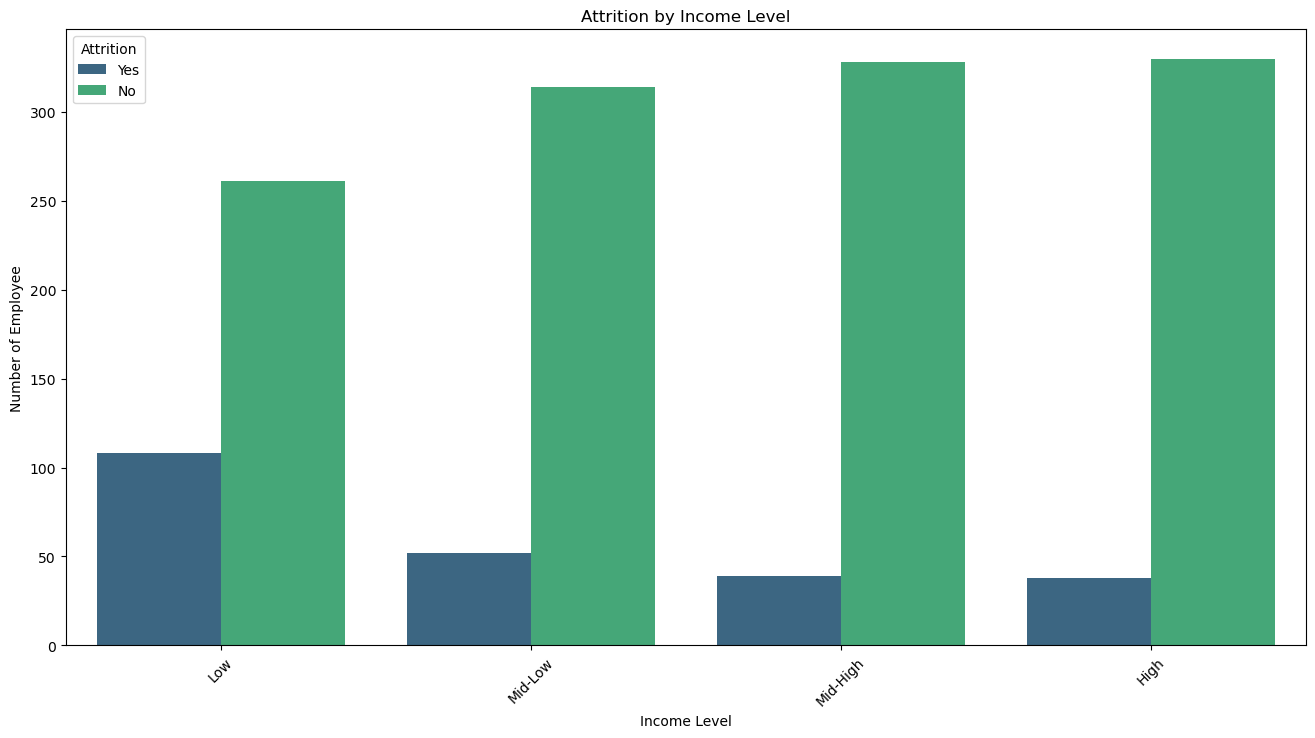

In [45]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Income_level', hue='Attrition', data=df_new, palette='viridis')

plt.xticks(rotation=45)
plt.title('Attrition by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Employee')
plt.show()

- Employees in the Low-income category have the highest number of attrition cases. This suggests that lower income may be a significant factor in employee turnover.
- Mid-Low, Mid-High, and High-income categories, the number of employees who have left the company is significantly lower compared to those who have stayed.

In [46]:
stats_left = df[df['Attrition'] == 'Yes']['YearsAtCompany'].describe()

print("Descriptive Statistics for Employees who Left:\n", stats_left)

Descriptive Statistics for Employees who Left:
 count    237.000000
mean       5.130802
std        5.949984
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       40.000000
Name: YearsAtCompany, dtype: float64


To show distribution of tenure by attrition

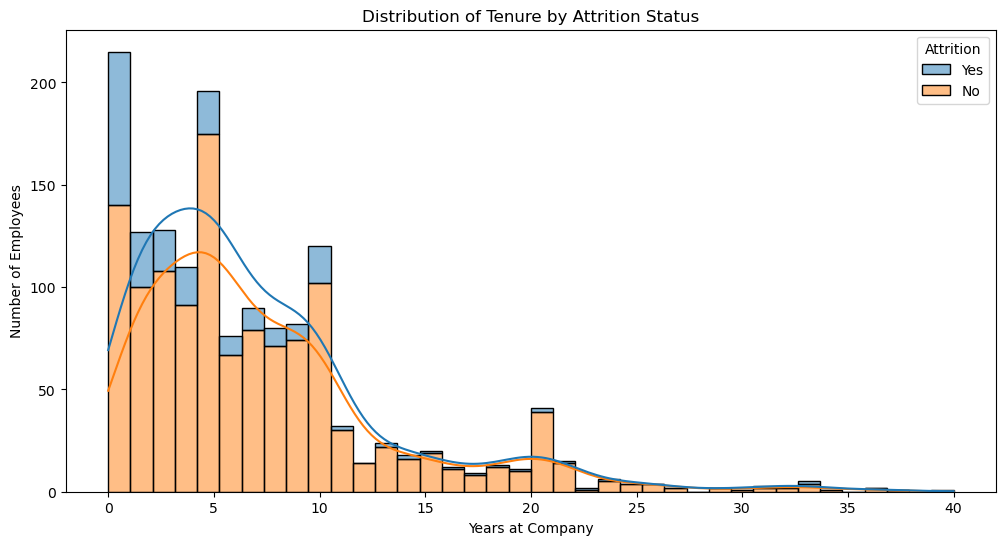

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Tenure by Attrition Status')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.show()

There is a high number of employees leaving the company within the first few years (0-5 years). This is particularly evident in the first year.

To create the education label with dictionary and mapping them with the Education column

In [48]:
education_levels = {
    1: 'Below High School',
    2: 'High School',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df_new['EducationLabel'] = df_new['Education'].map(education_levels)

df_new['EducationLabel']

0             High School
1       Below High School
2             High School
3                  Master
4       Below High School
              ...        
1465          High School
1466    Below High School
1467             Bachelor
1468             Bachelor
1469             Bachelor
Name: EducationLabel, Length: 1470, dtype: object

To visualize distribution of attrition for each education level.

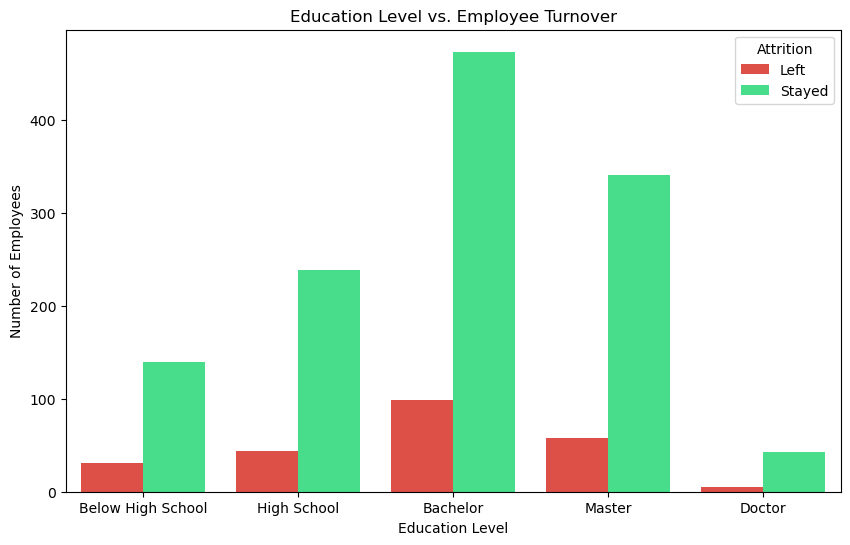

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationLabel', hue='Attrition', data=df_new, order=education_levels.values(), palette=['#F63A2E','#2EF688'])
plt.title('Education Level vs. Employee Turnover')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Left', 'Stayed'])

plt.show()

This goes hand in hand with the previous statement, as bachelors are the ones showing the highest level of attrition.

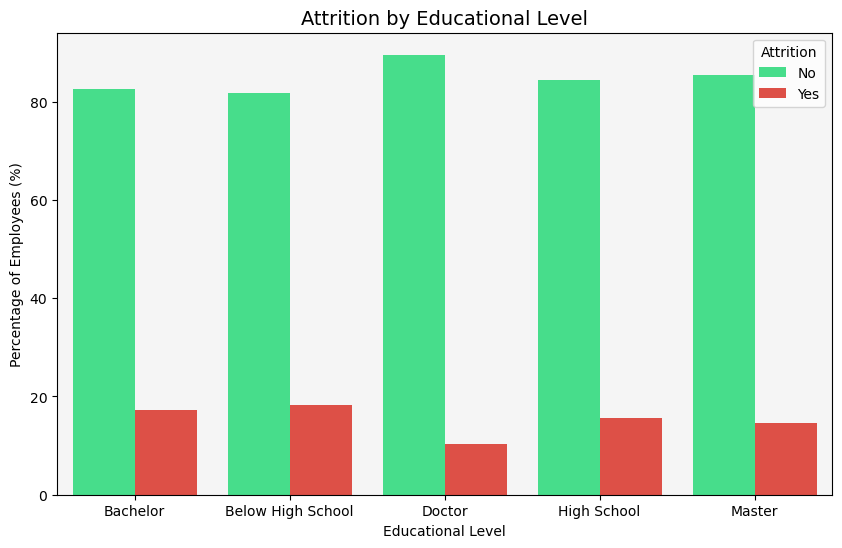

In [50]:
# Calculate the number and percentage of employees by Educational Level and Attrition
edu_count = df_new.groupby(['EducationLabel', 'Attrition']).size().reset_index(name='count')
edu_total = df_new.groupby(['EducationLabel']).size().reset_index(name='total')
edu_pct = pd.merge(edu_count, edu_total, on='EducationLabel')
edu_pct['percent'] = edu_pct.apply(lambda x: (x['count'] / x['total']) * 100, axis=1)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=edu_pct, x='EducationLabel', y='percent', hue='Attrition', palette=['#2EF688', '#F63A2E'])
bar_plot.set_title('Attrition by Educational Level', fontsize=14, ha='center')
bar_plot.set_xlabel('Educational Level')
bar_plot.set_ylabel('Percentage of Employees (%)')
bar_plot.set_facecolor('#f5f5f5')

In [119]:
Edfield_income = df.groupby('EducationField').MonthlyRate.mean()

In [52]:
df_new['Attrition_Numeric'] = df_new['Attrition'].map({"No": 0, "Yes": 1})

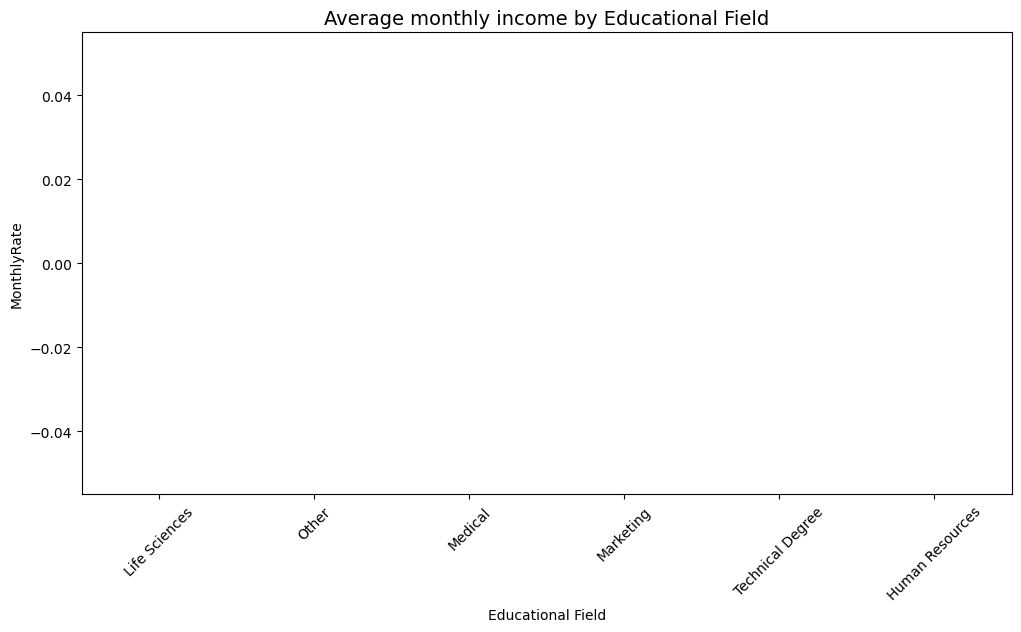

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(x='EducationField', y= Edfield_income, data=df, ci=None, palette='viridis')


plt.title('Average monthly income by Educational Field', fontsize=14, ha='center')
plt.xlabel('Educational Field')
plt.xticks(rotation=45)

plt.show()

HR is the most attrition rate

To create the variable that separate the dataframe for attrition is yes or no

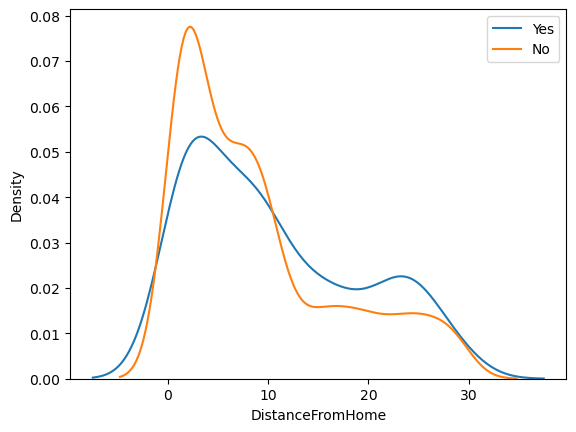

In [54]:
Attrition_Y = df[df['Attrition'] == 'Yes']
Attrition_N = df[df['Attrition'] == 'No']

sns.kdeplot(Attrition_Y.DistanceFromHome)
sns.kdeplot(Attrition_N.DistanceFromHome)
plt.legend(('Yes', 'No'))

In [55]:
dist_role_df = df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()
dist_role_df

Attrition                        No        Yes
JobRole                                       
Healthcare Representative  9.204918  17.666667
Human Resources            6.600000  13.416667
Laboratory Technician      9.329949   9.661290
Manager                    7.927835  10.000000
Manufacturing Director     9.533333   8.800000
Research Director          8.474359   7.000000
Research Scientist         8.869388   9.765957
Sales Executive            9.026022  12.649123
Sales Representative       9.000000   8.151515

To plot the average distance from home for each job role and attrition

<Figure size 1200x600 with 0 Axes>

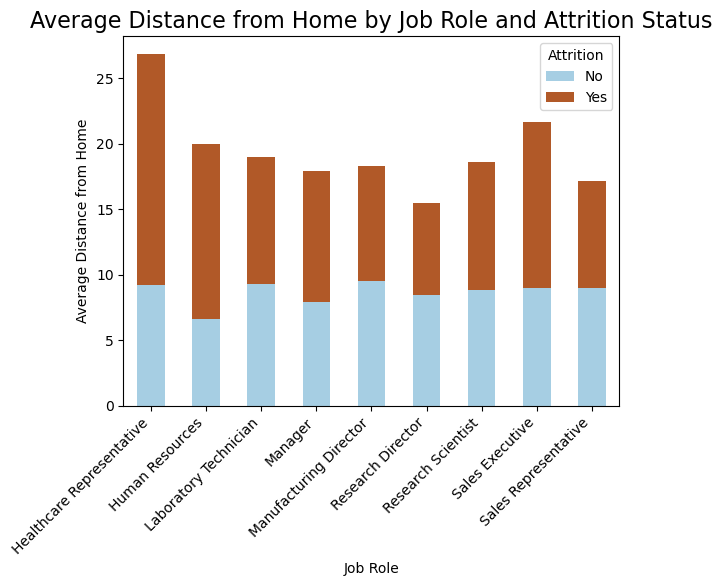

In [56]:
plt.figure(figsize=(12, 6))
dist_role_df.plot(kind='bar', stacked=True, colormap='Paired')

plt.title('Average Distance from Home by Job Role and Attrition Status', fontsize=16)
plt.xlabel('Job Role')
plt.ylabel('Average Distance from Home')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.show()

This role has the highest average distance from home for employees who left, significantly more than those who stayed.

To count the number of employee for each combination of attrition status and business travel frequency. Then visualize them.

In [57]:
work_bal_cnt = df.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='count')
work_bal_cnt

Attrition     BusinessTravel  count
0        No         Non-Travel    138
1        No  Travel_Frequently    208
2        No      Travel_Rarely    887
3       Yes         Non-Travel     12
4       Yes  Travel_Frequently     69
5       Yes      Travel_Rarely    156

<Figure size 1200x600 with 0 Axes>

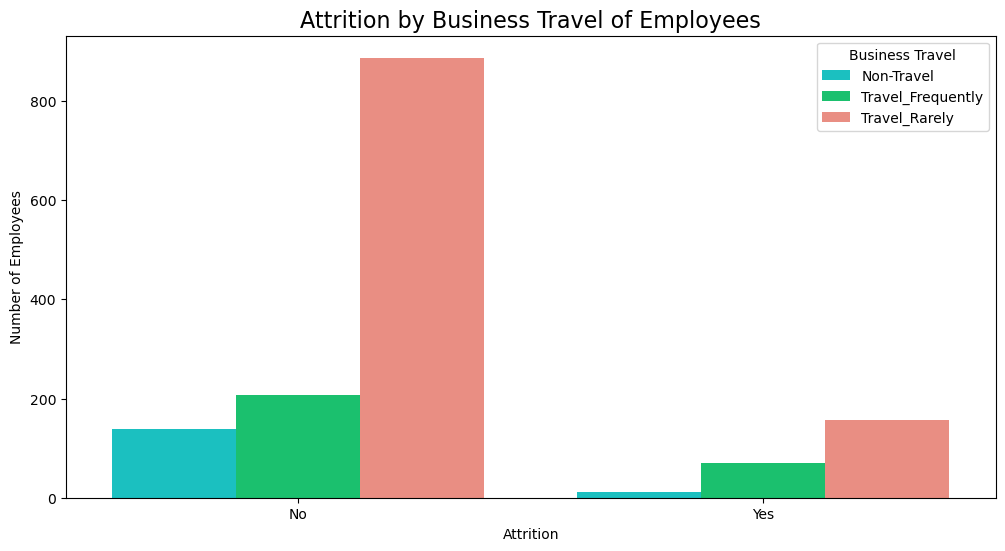

In [58]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
sns.barplot(data=work_bal_cnt, x='Attrition', y='count', hue='BusinessTravel', palette=['#00dbdb', '#00db6e', '#fa8072'])
plt.title('Attrition by Business Travel of Employees', fontsize=16)
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Business Travel')
plt.show()

Employees who travel frequently or rarely are more likely to leave the company compared to those who do not travel.

To visualize how overtime effected with attrition rate.

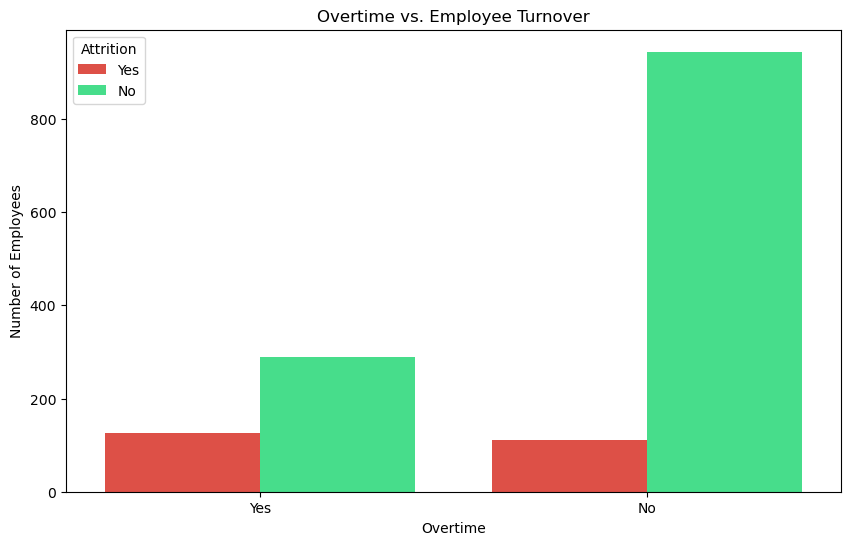

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette=['#F63A2E', '#2EF688'])
plt.title('Overtime vs. Employee Turnover')
plt.xlabel('Overtime')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

In [60]:
overtime_counts = Attrition_Y.groupby('OverTime').size().reset_index(name='count')
overtime_counts['percent'] = (overtime_counts['count'] / overtime_counts['count'].sum() * 100).round(2)

overtime_counts

OverTime  count  percent
0       No    110    46.41
1      Yes    127    53.59

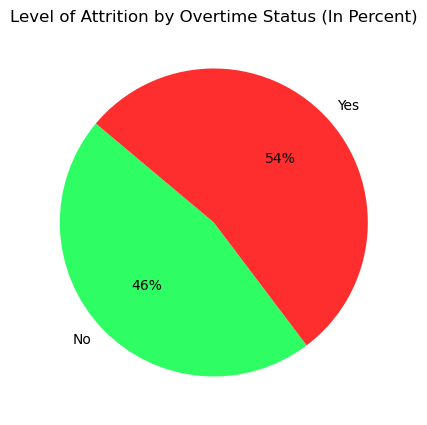

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 5))

colors = ['#2EFE64', '#FE2E2E']
ax1.pie(overtime_counts['percent'], labels=overtime_counts['OverTime'], autopct='%1.0f%%', colors=colors, startangle=140)
ax1.set_title('Level of Attrition by Overtime Status (In Percent)')

plt.show()

Over 54% of workers who left the organization worked overtime! Will this be a reason why employees are leaving?

To visualize pie chart shows the attrition rate by marital status.

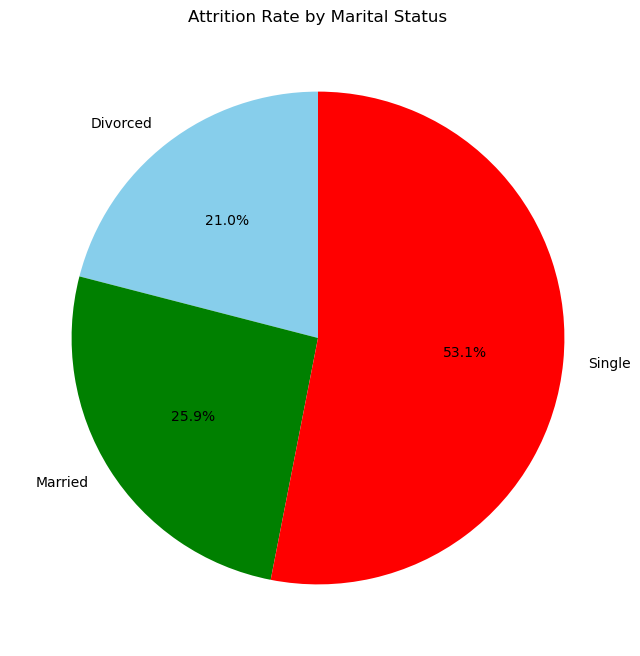

Attrition rates by marital status:
 MaritalStatus
Divorced    10.091743
Married     12.481426
Single      25.531915
Name: Attrition_Numeric, dtype: float64


In [62]:
attrition_by_marital_status = df_new.groupby('MaritalStatus')['Attrition_Numeric'].mean() * 100
plt.figure(figsize=(8, 8))
attrition_by_marital_status.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'green', 'red'])
plt.title('Attrition Rate by Marital Status')
plt.ylabel('')
plt.show()

print("Attrition rates by marital status:\n", attrition_by_marital_status)

The largest segment of the pie chart, 53.1%, represents single employees who have left the company. This indicates that more than half of the employees who leave are single.

creates a series of bar plots to visualize the relationship between satisfaction factors and attrition rate.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: F

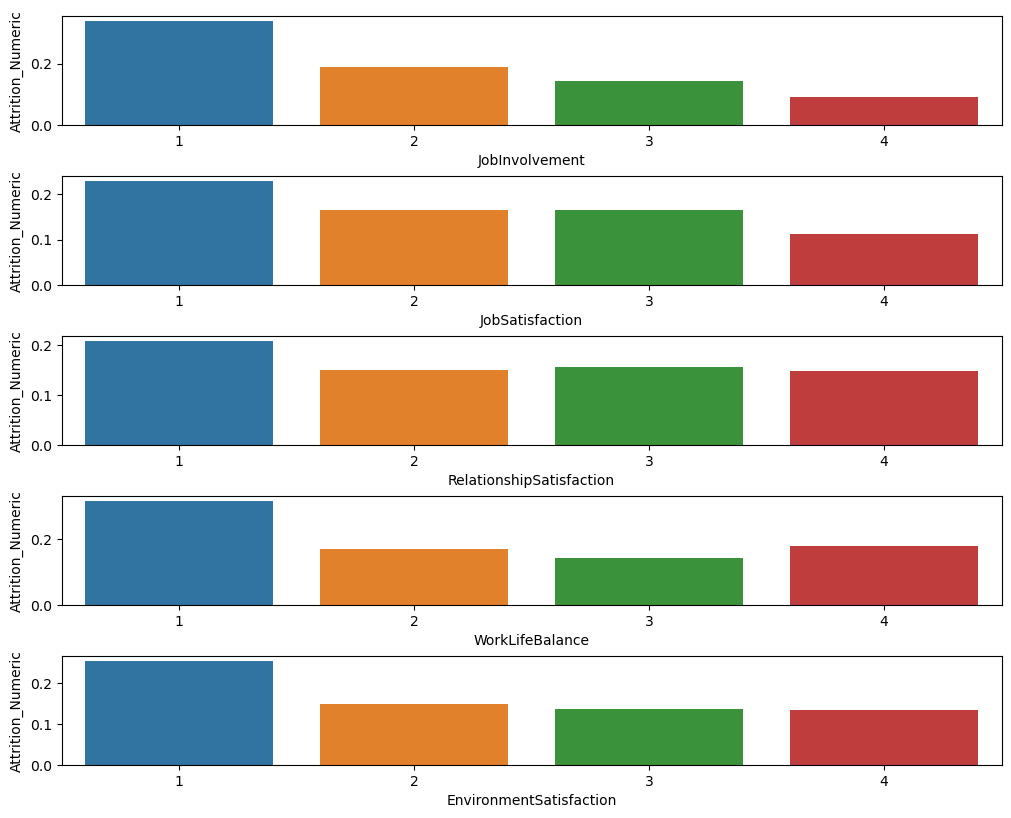

In [63]:
cols = ['JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']
fig, ax = plt.subplots(len(cols),1, figsize= (10,8), constrained_layout=True)

for i, col in enumerate(cols):
    
    sns.barplot(col,'Attrition_Numeric', data = df_new, ax = ax[i], ci = None)

It can be clearly seen that employees who are dissatisfied, have lower satisfaction levels, and poor work-life balance tend to have a higher attrition rate compared to their more satisfied counterparts.

## Feature Engineering

Transform non-numeric columns into numerical columns

In [64]:
data = df.copy()

In [65]:
for column in data.columns:
    if np.issubdtype(data[column].dtype, np.number):
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [67]:
#scaler = MinMaxScaler()
#data[data.columns] = scaler.fit_transform(data[data.columns])
#data.head()

Split the data into independent 'X' and dependent 'Y' variables

In [68]:
#Create a new column at the end of the dataframe that contains the same value 
data['Age_Years'] = data['Age']
#Remove the first column called age 
data = data.drop('Age', axis = 1)

data

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2       1102           2                 1   
1             0               1        279           1                 8   
2             1               2       1373           1                 2   
3             0               1       1392           1                 3   
4             0               2        591           1                 2   
...         ...             ...        ...         ...               ...   
1465          0               1        884           1                23   
1466          0               2        613           1                 6   
1467          0               2        155           1                 4   
1468          0               1       1023           2                 2   
1469          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             2               1                        2       0          94   
1             1               1                        3       1          61   
2             2               4                        4       1          92   
3             4               1                        4       0          56   
4             1               3                        1       1          40   
...         ...             ...                      ...     ...         ...   
1465          2               3                        3       1          41   
1466          1               3                        4       1          42   
1467          3               1                        2       1          87   
1468          3               3                        4       1          63   
1469          3               3                        2       1          82   

      ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0     ...                         1                 0                  8   
1     ...                         4                 1                 10   
2     ...                         2                 0                  7   
3     ...                         3                 0                  8   
4     ...                         4                 1                  6   
...   ...                       ...               ...                ...   
1465  ...                         3                 1                 17   
1466  ...                         1                 1                  9   
1467  ...                         2                 1                  6   
1468  ...                         4                 0                 17   
1469  ...                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4                         3                3               2   
...                     ...              ...             ...   
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4                      2                        2                     2   


In [69]:
#Split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 1:data.shape[1]].values 
Y = data.iloc[:, 0].values 

## Modeling

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    f2 = fbeta_score(Y_test, y_pred, beta=2)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F2 Score: {f2:.2f}")
    print("---------------------------")

Classifier: Decision Tree
Accuracy: 0.80
Precision: 0.25
Recall: 0.27
F1 Score: 0.26
F2 Score: 0.27
---------------------------
Classifier: Random Forest
Accuracy: 0.87
Precision: 0.45
Recall: 0.10
F1 Score: 0.17
F2 Score: 0.12
---------------------------
Classifier: KNN
Accuracy: 0.84
Precision: 0.24
Recall: 0.10
F1 Score: 0.14
F2 Score: 0.12
---------------------------
Classifier: Naive Bayes
Accuracy: 0.79
Precision: 0.32
Recall: 0.54
F1 Score: 0.40
F2 Score: 0.48
---------------------------


Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

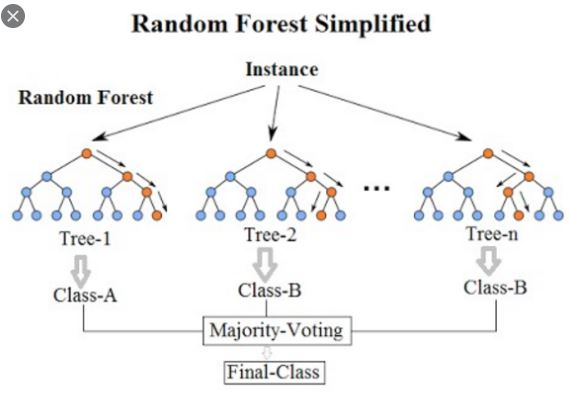

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 70, 90, 110, 130]
}

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

Best n_estimators: 90


In [95]:
best_rf_clf = RandomForestClassifier(n_estimators=best_n_estimators, criterion='entropy', random_state=0)
best_rf_clf.fit(X_train, Y_train)
y_pred = best_rf_clf.predict(X_test)

In [96]:
train_acc = best_rf_clf.score(X_train, Y_train)
test_acc = accuracy_score(Y_test, y_pred)
print(f"Train set Accuracy: {train_acc:.2f}")
print(f"Test set Accuracy: {test_acc:.2f}")

Train set Accuracy: 1.00
Test set Accuracy: 0.88


## Evaluation

In [97]:
cm = confusion_matrix(Y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print(f'Model Testing Accuracy = "{(TP + TN) / (TP + TN + FN + FP):.2f}"')

[[317   3]
 [ 43   5]]
Model Testing Accuracy = "0.88"


<AxesSubplot:xlabel='feature'>

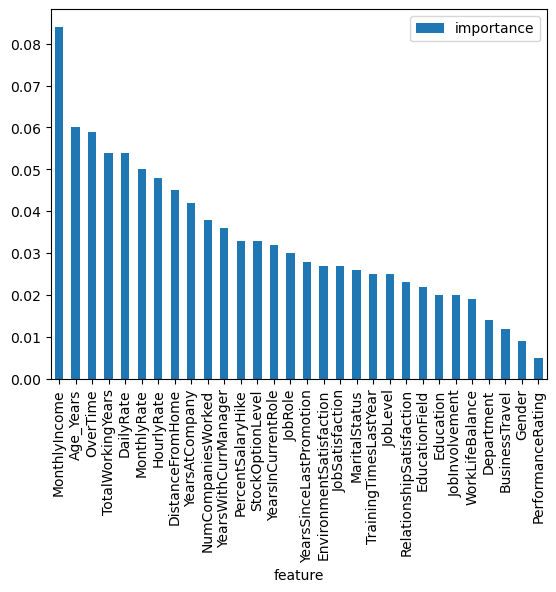

In [98]:
importances = pd.DataFrame({
    'feature': data.columns[1:],
    'importance': np.round(best_rf_clf.feature_importances_, 3)
})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.plot.bar()

## HR Prediction Use Case

In [99]:
import pickle

In [100]:
# Save model and features
with open('hr_attrition_model1.pkl', 'wb') as model_file:
    pickle.dump(best_rf_clf, model_file)
with open('hr_model_features1.pkl', 'wb') as feature_file:
    pickle.dump(data.columns[1:], feature_file)
print("Model and feature list have been saved successfully.")

Model and feature list have been saved successfully.


In [101]:
# Load model and features for prediction
with open('hr_attrition_model1.pkl', 'rb') as model_file:
    forest_model = pickle.load(model_file)
with open('hr_model_features1.pkl', 'rb') as feature_file:
    feature_list = pickle.load(feature_file)

In [116]:
def predict_attrition(data):
    """
    Predict attrition using the trained model.
    :param data: Dictionary with feature names as keys and feature values as values.
    :return: Dictionary with the predicted attrition and probability.
    """
    input_data = [data.get(feature, 0) for feature in feature_list]
    prediction = forest_model.predict([input_data])[0]
    probability = forest_model.predict_proba([input_data]).max()
    prediction_label = "Stay" if prediction == 0 else "Left"
    
    return {'Attrition': prediction_label, 'Probability': round(probability, 4)}

In [118]:
# Example usage:
input_data = {
    'BusinessTravel': 2, #0,1,2
    'DailyRate': 200,
    'Department': 1, #0,1,2
    'DistanceFromHome': 12,
    'Education': 4, #1,2,3,4,5
    'Gender': 1,
    'TotalWorkingYears': 20,
    'JobRole': 2, #1,2,3,4
    'MonthlyIncome': 5000,
    'Age_Years': 40
}

result = predict_attrition(input_data)
print(result)

{'Attrition': 'Stay', 'Probability': 0.5889}
